# BT4222 Assignment 1 (10 marks)

**Plagiarism Policy**

NUS takes a strict view of plagiarism and considers it a serious form of academic dishonesty. Any student found to have engaged in such misconduct will be subjected to disciplinary action by the University. Please refer to the NUS Plagiarism Policy.

For assignments in BT4222, using any AI tools to generate code is not allowed. Sharing any part of the solution among students is not allowed either. Following the recently concluded plagiarism cases, if assignments were caught with a high degree of similarity, the presumption of guilt is applied when no hard evidence can be provided by the suspect.  


**MOTIVATION**

**Part 1** According to the survey conducted among the former BT4222 students, rather than modeling, data preprocessing presented significant challenges in their projects. The thoughtfulness makes a dinstinction between project groups. In response to this, we have developed a a series of data preprocessing tasks, utilizing actual datasets from [Amazon Data 2018](https://cseweb.ucsd.edu/~jmcauley/datasets/amazon_v2/). Constrained by the capacity and workload of an assignment, this assignment servies as a **starting point** rather than a comprehensive example as we have substantially simplied the preprocessing tasks. For instances, we simply removed missing data and outliers, selected only a subset of features and conducted superficial feature engineering while more considerate and creative strategies should be considered based on different context and specific goals in your real projects.

**Part 2** We illustrate how to conduct a very preliminary recommendation by using cosine similarity.

# Part 1 (8 Marks)

### Amazon Review Dataset Information

The [Amazon Review Data (5-core)](https://cseweb.ucsd.edu/~jmcauley/datasets/amazon_v2/#subsets) contains review data for individual products, reduced to extract the 5-core such that each user has at least 5 reviews and each item has at least 5 reviews.

- **overall**: Rating of the product.
- **verified:** Indicates whether the user is verified.
- **reviewTime:** Datetime of the review in raw format. (e.g., 09 1, 2016)
- **reviewerID:** ID of the reviewer (e.g., A2SUAM1J3GNN3B).
- **asin:** ID of the product (e.g., 0000013714).
- **style:** A dictionary of product metadata. (e.g., {'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice Blue'})
- **reviewerName:** Name of the reviewer.
- **reviewText:** Text of the review.
- **summary:** Summary of the review.
- **unixReviewTime:** Datetime of the review in Unix time. (Same timestamp as reviewTime but in a different format)
- **vote:** Helpful votes of the review.
- **image:** Image links posted after receiving the product.

### Amazon Meta Dataset Information

The [Amazon Meta Data (complete)](https://cseweb.ucsd.edu/~jmcauley/datasets/amazon_v2/#complete-data) includes meta information for individual products, such as description, price, sales rank, brand info, and co-purchasing links.

- **category:** List of categories the product belongs to.
- **tech1:** The first tech detail table of the product.
- **description:** Description of the product.
- **fit:** The fit of the product. (Amazon uses customer feedback for size guidance. Users can choose the size feedback among the list. This feature contains a summary of different numbers of feedback across 5 size categories. Please note that fit information is available for Fashion product but not Beauty product.)
- **title:** Name of the product.
- **also_buy:** Related products also bought.
- **tech2:** The second tech detail table of the product.
- **brand:** Brand name.
- **feature:** Bullet-point format features of the product.
- **rank:** Sales rank information.
- **also_view:** Related products also viewed.
- **details:** Product details.
- **main_cat:** Category of product.
- **similar_item:** Similar product table.
- **date:** Date first available (at time of crawl).
- **price:** Price in US dollars (at time of crawl).
- **asin:** ID of the product (e.g., 0000031852).
- **imageURL:** URL of the product image.
- **imageURLHighRes:** URL of the high-resolution product image.

### Import Packages Needed

In [1]:
import os
import json
import gdown
import pandas as pd
import numpy as np
### Plot
import matplotlib.pyplot as plt
import seaborn as sns
### HTML
from bs4 import BeautifulSoup
import re
### Warnings
import warnings
### Text Preprocessing and Natural Language Processing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
import nltk
import re
import spacy
from wordcloud import WordCloud

### Download Data Files Needed

 For this assignment, we will work with data from the Beauty and Fashion categories, thus there are 2 review data files and 2 metadata files.

In [2]:
# Set the file names and IDs
# For Amazon Reivew Data
review_file_ids = {
    'All_Beauty_5.json': '1kommjYLqN_d4CUx0Gp_8vEDoxY1lJZ3N',
    'AMAZON_FASHION_5.json': '1tcCq8bT1jwLX8DdcGcAMPGuTGyl7iOqa',
}

# For Amazon Meta Data
meta_file_ids = {
    'meta_All_Beauty.json': '15HgucSX3RNmZ4vq4lhv_bhX6i2sAd2jU',
    'meta_AMAZON_FASHION.json': '1l-ItU19ggeSLkgahodzjnFkvK46MOU2G',
}

from google.colab import drive
drive.mount('/content/drive')

# Download files from Google Drive using gdown
# for filename, file_id in review_file_ids.items():
#     # gdown.download(f'https://drive.google.com/uc?id={file_id}', filename, quiet=False)
#     print(f'Downloaded: {filename}')

# for filename, file_id in meta_file_ids.items():
#     # gdown.download(f'https://drive.google.com/uc?id={file_id}', filename, quiet=False)
#     print(f'Downloaded: {filename}')

Mounted at /content/drive


## Task 1 - Data Loading (0.2 marks)

Load the Amazon Review Data files (**All_Beauty_5.json** and **AMAZON_FASHION_5.json** in `review_file_ids`) into a pandas DataFrame `review_df_raw`:

1. Initialize an empty list `review_data` to store the review data.
2. Iterate through the files in `review_file_ids`.
3. For each file, read and append the JSON data to the review_data using `json.loads()` and `line.strp()`.
4. Create the DataFrame `review_df_raw` from `review_data` list.

Similarly, load the Amazon Meta Data files (**meta_All_Beauty.json** and **meta_AMAZON_FASHION.json** in `meta_file_ids`) into a pandas DataFrame `meta_df_raw` ad check the shapes of both DataFrames.

In [3]:
### Data Loading: review data (0.1 marks)
import json
# Initialize an empty list to store the review data
review_data = []

review_files = [
    "/content/drive/MyDrive/Colab Notebooks/bt4222 week 1/Week3/BT4222 Assignment 1/AMAZON_FASHION_5.json",
    "/content/drive/MyDrive/Colab Notebooks/bt4222 week 1/Week3/BT4222 Assignment 1/All_Beauty_5.json"
]

for filepath in review_files:
    # Read and append JSON data to the review_data
    with open(filepath, 'r', encoding='utf-8') as file:

        # Read each line, parse JSON, and append to the review_data list
        for line in file:
            review_data.append(json.loads(line.strip()))

# Create a DataFrame from the review_data
review_df_raw = pd.DataFrame(review_data)

# The shape of the Dataframe should be (8445, 12)
print("Dataframe Shape:", review_df_raw.shape)
review_df_raw.head(3)

Dataframe Shape: (8445, 12)


,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Orange'}",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
1,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Black (3746...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
2,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Gray L...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN


In [4]:
### Data Loading: meta data (0.1 marks)
meta_data = []

meta_files = [
    "/content/drive/MyDrive/Colab Notebooks/bt4222 week 1/Week3/BT4222 Assignment 1/meta_AMAZON_FASHION.json",
    "/content/drive/MyDrive/Colab Notebooks/bt4222 week 1/Week3/BT4222 Assignment 1/meta_All_Beauty.json"
]

for filepath in meta_files:
    # Read and append JSON data to the review_data
    with open(filepath, 'r', encoding='utf-8') as file:
        # Read each line, parse JSON, and append to the review_data list
        for line in file:
            meta_data.append(json.loads(line.strip()))

# Create a DataFrame from the review_data
meta_df_raw = pd.DataFrame(meta_data)

# The shape of the Dataframe should be (219529, 19)
print("Dataframe Shape:", meta_df_raw.shape)
meta_df_raw.head(3)

Dataframe Shape: (219529, 19)


,title,brand,feature,rank,date,asin,imageURL,imageURLHighRes,description,price,also_view,also_buy,fit,details,similar_item,tech1,category,tech2,main_cat
0,Slime Time Fall Fest [With CDROM and Collector...,Group Publishing (CO),[Product Dimensions:\n \n8....,"13,052,976inClothing,Shoesamp;Jewelry(",8.70 inches,0764443682,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,XCC Qi promise new spider snake preparing men'...,NaN,NaN,"11,654,581inClothing,Shoesamp;Jewelry(",5 star,1291691480,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Magical Things I Really Do Do Too!,Christopher Manos,[Package Dimensions:\n \n8....,"19,308,073inClothing,ShoesJewelry(",5 star,1940280001,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,[For the professional or amateur magician. Ro...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Task 2 - Remove Duplicate Rows (0.4 marks)

In this assignment, we will only consider the following columns for each dataframe.
- Review Data: overall, reviewTime, reviewerID, asin, reviewText, vote.
- Meta Data: fit, title, price, asin.

1. Create two new DataFrames (`review_df` and `meta_df`) by selecting the specifc columns mentioned above from the original DataFrames `review_df_raw` and `meta_df_raw`.
2. Drop duplicate rows from each dataframe and reset the index.

In [5]:
### review_df (0.1 marks)
review_columns = ['overall', 'reviewTime', 'reviewerID', 'asin', 'reviewText', 'vote']
review_df = review_df_raw[review_columns].copy()

### Drop duplicate rows and reset the index (0.1 marks)
review_df.drop_duplicates(inplace=True)
review_df.reset_index(drop=True, inplace=True)

In [6]:
### meta_df (0.1 marks)
meta_columns = ['fit', 'title', 'price', 'asin']
meta_df = meta_df_raw[meta_columns].copy()

### Drop duplicate rows and reset the index (0.1 marks)
meta_df.drop_duplicates(inplace=True)
meta_df.reset_index(drop=True, inplace=True)

## Task 3 - Remove Outliers


#### Task 3.1: title (0.6 marks)

The `title` column of `meta_df`, which is of string type, contains values with unusually long lengths, indicating the presence of outliers. In this task, you are required to identify the outliers using [Z-score method](https://www.khanacademy.org/math/statistics-probability/modeling-distributions-of-data/z-scores/a/z-scores-review) (here we assume that data points with a z score higher than 3 are considered as outliers) and treat them as missing values, which will be removed in the next step.

1. Create a new column `title_length` in the DataFrame `meta_df` by calculating the length of each title. (Set the value as 0 if the correponding `title` column has NaN values.)
2. Check the statistics of `title_length` using `describe()` method.
3. Calculate the mean and standard deviation of the `title_length` column.
4. Set the threshold for identifying outliers to 3.
5. Identify outliers of the `title_length` column and set the corresponding titles to np.nan.
6. Drop the `title_length` column from the DataFrame.

**Tips**: For your project, it is important to thoroughly examine the values identified as outliers, considering the contextual information, before making any decisions. Instead of applying rigid rules to automatically detect and remove all outliers, the focus should be on understanding the reasons behind each outlier. This approach ensures a more nuanced and informed handling of outliers within the given contexts.

In [7]:
### Drop outliers: title (meta_df)
### title_length (0.1 marks)
meta_df['title_length'] = meta_df['title'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)

### Check 'title_length' statistics using describe() (0.1 marks)
title_length_stats = meta_df['title_length'].describe()
print(title_length_stats)

count    218682.000000
mean        203.163114
std        3918.966900
min           0.000000
25%          56.000000
50%          71.000000
75%          84.000000
max      424341.000000
Name: title_length, dtype: float64


In [8]:
### Calculate mean and standard deviation, and set the threshold (0.1 marks)
mean_length = title_length_stats['mean']
std_dev_length = title_length_stats['std']
threshold = 3

### Identify outliers and set the corresponding titles to np.nan (0.2 marks)
meta_df['title'] = np.where(
    np.abs(meta_df['title_length']-mean_length) > threshold * std_dev_length ,
    np.nan,
    meta_df['title']
)

### Drop the 'title_length' column (0.1 marks)
meta_df.drop(columns=['title_length'], inplace=True)

#### Task 3.2: price (0.6 marks)

Similarly, the `price` column of `meta_df` (of type `str`) also contains values with unusually long lengths, indicating the presence of outliers.

1. Create a new column `price_length` in the DataFrame `meta_df` by calculating the length of each price value. (Set the value as 0 if the correponding `price` column has NaN values.)
2. Check the statistics of `price_length` using `describe()` method and display its unique values.
3. Identify the outlier values by inspecting the content in `price` corresponding to the abnormal value in `price_length` and set the corresponding value of `price` to np.nan. (Hint: both null price information and abnormal price information should be treated as outliers)
4. Drop the `price_length` column from the DataFrame.

In [9]:
### Drop outliers: price (meta_df)
### price_length (0.1 marks)
meta_df['price_length'] = meta_df['price'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)

### Check 'price_length' statistics using describe() and print unique values (0.2 marks)
price_length_stats = meta_df['price_length'].describe()
print(price_length_stats)
print(meta_df['price_length'].unique())

count    218682.000000
mean          4.534324
std         130.301479
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        4648.000000
Name: price_length, dtype: float64
[   0    5    6   15   17    7   14   16   13   21    9   10   19   18
 4648]


In [10]:
### Identify outliers and set the corresponding prices to np.nan (0.2 marks)
meta_df['price'] = np.where(
    np.abs(meta_df['price_length'] - meta_df['price_length'].mean()) > threshold * meta_df['price_length'].std() ,
    np.nan,
    meta_df['price']
)

### Drop the 'price_length' column (0.1 marks)
meta_df.drop(columns=['price_length'], inplace=True)

## Task 4 - Handle Missing Values (0.6 marks)

For Amazon Review Data `review_df`:
1. Check the count of missing values in each column and drop the rows where `reviewText` is NaN and then reset the index.
2. Fill NaN values in the `vote ` column with empty string `''`.

For Amazon Meta Data `meta_df`:
1. Check the count of missing values in each column and drop the rows where `title` or `price` is NaN and then reset the index.
2. Fill NaN values in the `fit ` column with empty string `''`.

**Tips**: Please note that here we drop rows with missing values for simplification purpose. It is a very naive way of handling missing values which may cause loss of information. For your project, you need to examine the distribution of missing values across different categories and understand the reasons behind their absence. This analysis is critical for minimizing information loss and identifying potential biases introduced by the uneven distribution of missing values.

In [11]:
### review_df
### Check the count of NaN values in each column (0.1 marks)
print(review_df.isnull().sum())

### Drop rows where 'reviewText' has NaN values and reset index (0.1 marks)
review_df = review_df.dropna(subset=['reviewText']).reset_index(drop=True)

### Fill NaN values in the 'vote' column with an empty string '' (0.1 marks)
review_df['vote'] = review_df['vote'].fillna('')

overall          0
reviewTime       0
reviewerID       0
asin             0
reviewText      20
vote          6578
dtype: int64


In [12]:
### meta_df
### Check the count of NaN values in each column (0.1 marks)
print(meta_df.isnull().sum())

### Drop rows where 'title' or 'price' has NaN values and reset index (0.1 marks)
meta_df = meta_df.dropna(subset=['title', 'price']).reset_index(drop=True)

### Fill NaN values in the 'fit' column with an empty string '' (0.1 marks)
meta_df['fit'] = meta_df['fit'].fillna('')

fit      181367
title       435
price    168578
asin          0
dtype: int64


## Task 5 - Feature Engineering

#### Task 5.1: Merge Two DataFrames (0.9 marks)

1. Based on the `asin` values (product IDs), check the match between `review_df` and `meta_df` by answering the questions below. (Hint: try using the `set()` function)

2. Merge the `review_df` and `meta_df` DataFrames into `data_df` by performing a left join of `meta_df` to `review_df` based on the `asin` column.

3. Remove rows with missing values and reset the index.

**Tips**: Here we drop rows with missing values for simplification purpose. For your project, you need to examine the distribution of missing values and understand the reasons behind their absence.

In [13]:
### Questions:
# 1) Calculate the number of products with product information (asin in meta_df)
# but no review information (asin not in review_df): YOUR ANSWER HERE (0.1 marks)
unique_meta_prod=set(meta_df['asin'])
unique_review_prod=set(review_df['asin'])

num_products_without_reviews = len(unique_meta_prod - unique_review_prod)
print(num_products_without_reviews)

49895


In [14]:
# 2) Calculate the number of products with review information (asin in review_df)
# but no product information (asin not in meta_df): YOUR ANSWER HERE (0.1 marks)
num_products_without_meta = len(unique_review_prod - unique_meta_prod)
print(num_products_without_meta)

5


In [15]:
# 3) For products with review information (asin in review_df) but no product
# information (asin not in meta_df), what is the number of reviews for each product?
# Create a DataFrame with columns 'asin' and 'reviewCount' to show the result.
# Sort the DataFrame by 'reviewCount' in descending order and display the top 5 rows. (0.5 marks)

prod_no_meta = list(unique_review_prod - unique_meta_prod)
# Filter review_df to include only ASINs without product information
review_df_no_meta = review_df[review_df['asin'].isin(prod_no_meta)]

review_count_df = review_df_no_meta.groupby('asin')['vote'].count().reset_index(name='reviewCount')
review_count_df.sort_values(by='reviewCount', ascending=False).head(5)

,asin,reviewCount
1,B0014F7B98,370
0,B000YFSR4W,18
2,B0014HA6VG,2
3,B00ZUA6AJK,1
4,B01595OS62,1


In [16]:
### data_df (0.1 marks)
data_df = meta_df.merge(review_df, on='asin', how='left')

### Remove rows with missing values and reset the index (0.1 marks)
data_df = data_df.dropna().reset_index(drop=True)

#### Task 5.2: reviewTime (0.1 marks)

Convert `reviewTime` Column to Datetime using `pd.to_datetime()`.


In [17]:
### reviewTime (0.1 marks)
data_df['reviewTime'] = pd.to_datetime(data_df['reviewTime'])

#### Task 5.3: fit (0.5 marks)

Amazon utilizes customer feedback for size guidance, allowing users to select the size feedback from a list. The `fit` column contains a summary of different numbers of feedback across five size categories for each product. As this feature presents size feedback in string format with HTML tags, we need to use feature engineering to extract useful information.

**Hint**: You are given the `extract_size_feedback` function that can extract the size feedback information using the HTML tags provided in the `fit` column. This function takes the HTML string as input and returns a dictionary with size labels as keys and corresponding feedback counts as values.

1. Select one HTML string value from the `fit` column (`example_html`) where the value is not empty.
2. Apply the `extract_size_feedback` function on the HTML string (`example_html`) to check the function output.
3. Create a list of the unique size feedback categories from the `fit` column by **iterating** over each HTML string in the `fit` column of the `data_df` DataFrame and extracting the size feedback categories.
4. For each size feedback category, use the `apply` function to create a new column (named by the size feedback category), the cell value should be the corresponding number of feedback of this size category for this product extracted by `extract_size_feedback` (If the `fit` column is empty, set the count to 0.)
5. Drop the `fit` column.

In [18]:
def extract_size_feedback(html_string):
    """
    Extracts size feedback information from HTML string.

    Parameters:
    - html_string (str): The HTML string containing size feedback information.

    Returns:
    - dict: A dictionary with size labels as keys and corresponding feedback counts as values.
    """
    # Parse HTML with BeautifulSoup
    soup = BeautifulSoup(html_string, 'html.parser')

    # Initialize a dictionary to store size feedback
    size_feedback = {}

    # Find all rows in the histogram
    rows = soup.find_all('tr', class_='a-histogram-row')

    # Extract information for each size category
    for row in rows:
        # Extract size label
        size_label = row.find('span').get_text(strip=True)

        # Extract count
        count = int(row.find('span').findNext('span').get_text(strip=True).replace(',', ''))

        size_feedback[size_label] = count

    return size_feedback

In [19]:
### fit
### example_html (0.1 marks)
example_html = data_df.loc[data_df['fit'].notnull(), 'fit'].iloc[0]

### Apply the extract_size_feedback on example_html (0.1 marks)
extract_size_feedback(example_html)

{'Too small': 64,
 'Somewhat small': 61,
 'Fits as expected': 296,
 'Somewhat large': 6,
 'Too large': 3}

In [20]:
### List of the unique size feedback categories (0.1 marks)
unique_size_feedback = set()

for html_string in data_df['fit']:
    size_feedback = extract_size_feedback(html_string)
    unique_size_feedback.update(size_feedback.keys())

unique_size_feedback_categories_list = list(unique_size_feedback)

In [21]:
### Create a new column in data_df for each size feedback category (0.1 marks)
# Iterate over each unique size feedback category
for category in unique_size_feedback_categories_list:
    # Define a lambda function to extract the count for the size category
    extract_count = lambda html_string: extract_size_feedback(html_string).get(category, 0) if pd.notnull(html_string) else 0

    # Create a new column named by the size feedback category
    data_df[category] = data_df['fit'].apply(extract_count)


### Drop the original 'fit' column (0.1 marks)
data_df.drop(columns=['fit'], inplace=True)

#### Task 5.4: price (0.6 marks)

The `price` column contains the price information of each product in string form. For each product, its `price` can be either a single price or a price range. For this task, you are required to extract the price information by the following steps:

1. Use the `apply` function on the `price` column of the DataFrame (`data_df`) to create a list (`len_idx`) containing the length of each value in the `price` column (converted to strings). The length represents the number of characters in each price value.
2. Define a function `extract_price_range` that takes a price string as input and returns a dictionary with 'min' and 'max' keys representing the minimum and maximum price values. (If the `price` is a single value, set minimum and maximum values to be the same.)
3. Use the `apply` function to create new columns (`min_price` and `max_price`) in the DataFrame by extracting minimum and maximum prices from the `price` column using the defined function.
4. Drop the `price` column.

In [22]:
### price
### len_idx (0.1 marks)
len_idx = data_df['price'].apply(lambda x: len(x))

In [23]:
data_df['price']

0       $10.02 - $25.01
1       $10.02 - $25.01
2       $10.02 - $25.01
3       $10.02 - $25.01
4       $10.02 - $25.01
             ...       
6892             $11.25
6893             $11.25
6894             $11.25
6895             $11.25
6896             $11.25
Name: price, Length: 6897, dtype: object

In [24]:
### Define function to extract price range (0.2 marks)
def extract_price_range(price):
    min_price = None
    max_price = None
    price = price.replace('$','')
    if price == '':
      min_price = 0
      max_price = 0
    elif '-' in price :
      min, max = map(float, price.split(' - '))
      min_price = min
      max_price = max
    else:
      same = float(price)
      min_price = same
      max_price = same
    return {'min':min_price, 'max':max_price}

In [25]:
### Create two new colulmns 'min_price' and 'max_price' (0.2 marks)
data_df['min_price'] = data_df['price'].apply(extract_price_range).apply(lambda x: x['min'])
data_df['max_price'] = data_df['price'].apply(extract_price_range).apply(lambda x: x['max'])

### Drop the original 'price' column (0.1 marks)
data_df.drop(columns=['price'], inplace=True)

#### Task 5.5: vote (0.1 marks)

Convert the `vote` from string to numeric values. (If the `vote` column is empty, set the count to 0.)

In [26]:
### vote (0.1 marks)
data_df['vote'] = pd.to_numeric(data_df['vote'], errors='coerce').fillna(0)

#### Task 5.6: reviewText (0.8 marks)

Text processing is vital in NLP tasks to clean and structure raw text data. For this task, define a function `process_text` that takes a textual value as input and applies the following processing steps in sequence:

1. Convert the input text to lowercase using the `lower()` function.

2. Tokenize the lowercase text using the `word_tokenize` function from the NLTK library.

3. Create a list (`alphabetic_tokens`) containing only alphabetic tokens using a list comprehension with a regular expression match.

4. Remove stopwords words
  - Obtain a set of English stopwords using the `stopwords.words('english')` method
  - Define a list of **at least 5 words** that should not be removed and provide your reasoning in comments. (**Hint**: for **sentiment analysis**, some words should not be removed from the text as they may affect the sentiment of the review (e.g.: "no", "not"))
  - Remove the stopwords (excluding those that should not be removed) from `tokens` column.

5. Apply lemmatization to each token in the list (`lemmatized_words`) using the `lemmatize` method.

6. Join the lemmatized tokens into a single processed text using the `join` method and return the processed text.

Creating a new column `processed_review` in data_df by applying the `process_text` function to each element in the `reviewText` column.


In [27]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [28]:
### Define function to process text (0.6 marks)
def process_text(text):
    processed_text = ""
    # Convert text to lowercase
    text_lower = text.lower()

    # Tokenize the lowercase text
    tokens = word_tokenize(text_lower)
    # Define a regular expression to match alphabetic tokens
    alpha_regex = re.compile('[a-zA-Z]+')

    # Create a list containing only alphabetic tokens
    alphabetic_tokens = [token for token in tokens if alpha_regex.match(token)]

    # Remove stopwords (excluding exceptions)
    exceptions = ['no', 'not', 'nothing', 'very', 'excellent']
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in alphabetic_tokens if token not in stop_words or token in exceptions]

    # WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the lemmatized tokens into a single processed text
    processed_text = ' '.join(lemmatized_words)

    return processed_text

In [29]:
### processed_review (0.1 marks)
data_df['processed_review'] = data_df['reviewText'].apply(process_text)

In [30]:
### Your Reasoning Here (0.1 marks)
    # words include negations and words that show degrees of the sentiment
    # and are crucial for sentiment analysis to determine the sentiment of the text.

## Task 6: Visualization

#### Task 6.1: review length and overall ratings (0.6 marks)

**Purpose**: check if the review length varies by the overall ratings

1. Create a new DataFrame (`positive_vote_df`) by keeping rows from data_df where the `vote` column is greater than 0.
2. Add a new column `reviewText_length` to positive_vote_df that represents the length of each review in terms of the number of words (use str.split(" ")).
3. Remove rows from `positive_vote_df` where the `reviewText_length` is greater than or equal to 300. (**Tips**: Here the threshold of 300 is selected for simplification purpose. For your project, you should explicitly claim and justify why you select certain threshold for excluding data points from the dataset.)
4. Create **a box plot** using the seaborn library to visualize the distribution of review lengths (`reviewText_length`) for different overall ratings (`overall`). Set `showmeans=True` to display mean markers.
5. Set a title for the plot to describe the content being visualized. Label the x-axis as 'Overall Ratings' and the y-axis as 'Review Length'.
6. Write 1-2 sentences about the insight you obtained based on the observation.

In [31]:
### positive_vote_df (0.1 marks)
positive_vote_df = data_df[data_df['vote'] > 0].copy()

### reviewText_length (0.1 marks)
positive_vote_df['reviewText_length'] = positive_vote_df['reviewText'].apply(lambda x: len(x.split(" ")))

### Remove rows with reviewText length greater than or equal to 300 from positive_vote_df (0.1 marks)
positive_vote_df = positive_vote_df[positive_vote_df['reviewText_length'] < 300]

Text(0, 0.5, 'Review Length')

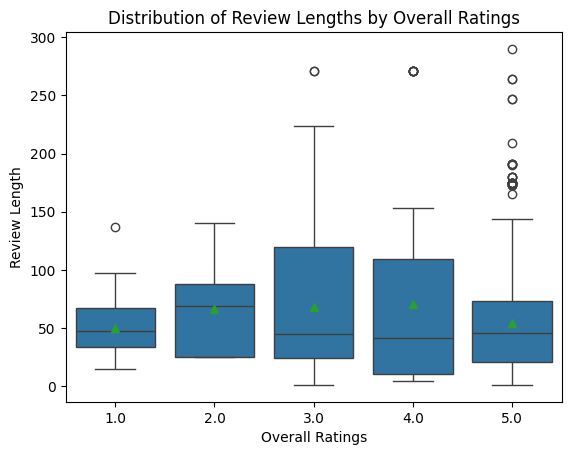

In [32]:
### Plot (0.2 marks)
sns.boxplot(x='overall', y='reviewText_length', data=positive_vote_df, showmeans=True)
plt.title('Distribution of Review Lengths by Overall Ratings')
plt.xlabel('Overall Ratings')
plt.ylabel('Review Length')

In [33]:
### YOUR INSIGHTS HERE (0.1 marks)
# The review length seems to follow a normal distibution.
# There are alot of outliers above the boxplot for ratings 5.0,
# a higher word count might mean that the reviews are more detailed and might
# mean that there are many genuine extremely positive reviews, but the box plot
# might have been skewed by many "blind" 5 star reviews too where ratings does not reflect product quality.

#### Task 6.2: size feedback and overall ratings (1.1 marks)
**Purpose**: Check if the distribution of fitting feedback differs by the overall rating

1. Create a list named `size_feedback_columns` containing the 5 size feedback categories: `'Too small', 'Somewhat small', 'Fits as expected', 'Somewhat large', and 'Too large'`.

2. Generate a new dataframe from `data_df` by keeping the rows where the **sum** of the size feedback columns is greater than 0 (set as `size_feedback_data`).

3. Group the `size_feedback_data` DataFrame by the `asin` column and calculate the mean of `overall` (rating) and the mean of each size feedback column (set as `product_level_data`).

4. We would like to check the percentage of fit and unfit by creating two new columns `fit_perc` and `unfit_perc` in the `product_level_data` DataFrame based on the formulas below:
  - `fit_perc` = `Fits as expected` / (`Too small`+`Somewhat small`+`Fits as expected`+`Somewhat large`+`Too large`)
  - `unfit_perc` = `Too small`+`Too large` / (`Too small`+`Somewhat small`+`Fits as expected`+`Somewhat large`+`Too large`)

6. Create two scatter plots side by side (Hint: use `plt.subplots()`):
  - Create a scatter plot on the left with 'Overall' (`overall`) on the x-axis and 'Fit Percentage' (`fit perc`) on the y-axis. Use blue color and add labels and the legend.
  - Create a scatter plot on the right with 'Overall' (`overall`) on the x-axis and 'Unfit Percentage' (`unfit perc`) on the y-axis. Use red color and add labels and a legend.

7. Write 1-2 sentences about the insight you obtained based on the observation.

In [34]:
### List of size feedback columns (0.1 marks)
size_feedback_columns = ['Too small', 'Somewhat small', 'Fits as expected', 'Somewhat large', 'Too large']

### size_feedback_data (0.1 marks)
size_feedback_data = data_df[data_df[size_feedback_columns].sum(axis=1) > 0].copy()

### product_level_data (0.1 marks)
product_level_data = size_feedback_data.groupby('asin').agg({'overall': 'mean',
                                                             'Too small': 'mean',
                                                             'Somewhat small': 'mean',
                                                             'Fits as expected': 'mean',
                                                             'Somewhat large': 'mean',
                                                             'Too large': 'mean'})

### fit_perc and unfit_perc (0.2 marks)
product_level_data['fit_perc'] = product_level_data['Fits as expected'] / product_level_data[size_feedback_columns].sum(axis=1)
product_level_data['unfit_perc'] = (product_level_data['Too small'] + product_level_data['Too large']) / product_level_data[size_feedback_columns].sum(axis=1)

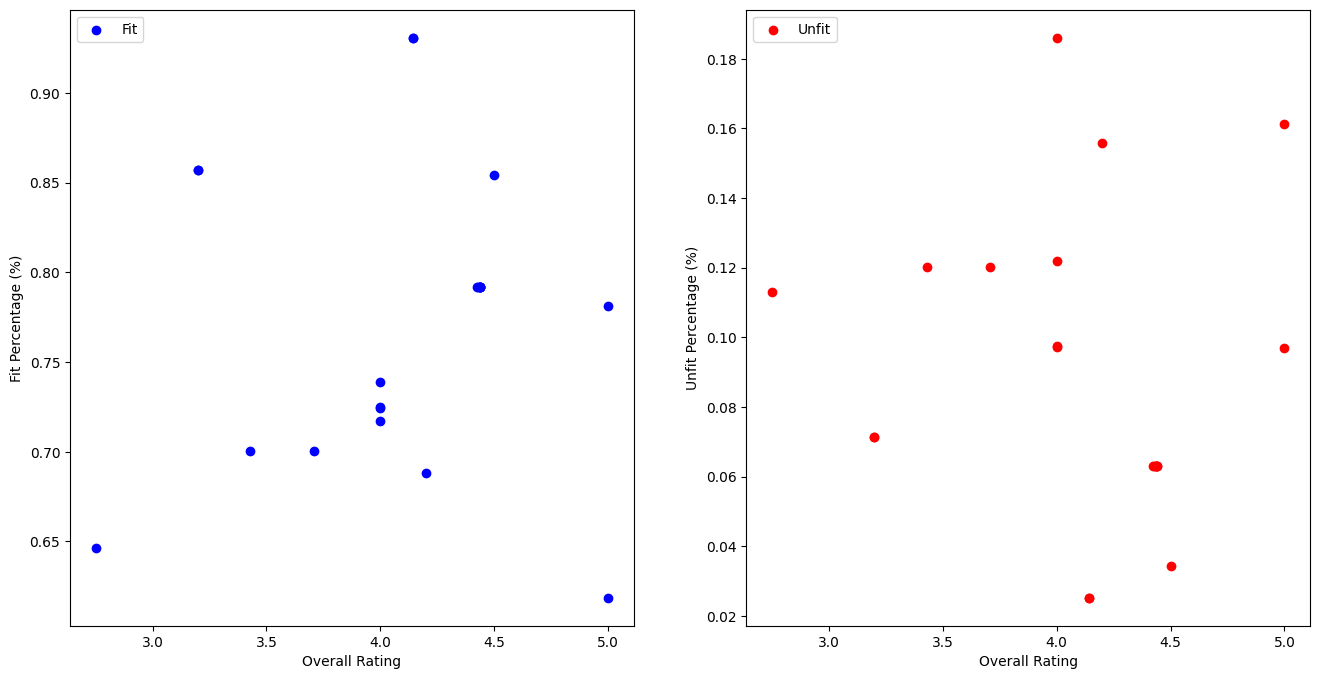

In [35]:
### Plot (0.5 marks)
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Plot 1: Overall vs. Fit Percentage
ax1.scatter(product_level_data['overall'], product_level_data['fit_perc'], color='blue')
ax1.set_xlabel('Overall Rating')
ax1.set_ylabel('Fit Percentage (%)')
ax1.legend(['Fit'], loc='upper left')

# Plot 2: Overall vs. Unfit Percentage
ax2.scatter(product_level_data['overall'], product_level_data['unfit_perc'], color='red')
ax2.set_xlabel('Overall Rating')
ax2.set_ylabel('Unfit Percentage (%)')
ax2.legend(['Unfit'], loc='upper left')

plt.show()

In [36]:
### YOUR INSIGHTS HERE (0.1 marks)
# for all the ratings, there is majority with review the it fits perfectly (>60%),
# hence we can say that the low ratings comers from issues other than fit

#### Task 6.3: word cloud (0.9 marks)
**Purpose**: A word cloud visually summarizes the most frequently occurring words in a product review, offering a quick and engaging way to highlight key themes, identify prevalent sentiments, and provide a concise overview of customer feedback.

1. Define a function `extract_adjectives` that takes a piece of text as input, tokenizes it, performs part-of-speech tagging using `pos_tag`, and extracts adjectives (tag: "JJ").
2. Define a function `generate_word_cloud_adjectives` that takes a text, extracts adjectives, and generates a Word Cloud for visualization. Set the params as `width=800, height=400, background_color='white'`.
3. Create two variables `low_star_reviews` and `high_star_reviews` by combining all the processed_reviews for low and high ratings in `data_df` respectively (Hint: use `" ".join()`). Use thresholds overall==1 for low ratings and overall==5 for high ratings.
4. Apply the `generate_word_cloud_adjectives` function to generate Word Clouds for adjectives in `low_star_reviews` and `high_star_reviews`.
5. Observe the generated Word Clouds and analyze the adjectives used in low and high rating reviews.

In [37]:
# Download NLTK resources for part-of-speech tagging
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [38]:
### Define function to extract adjectives (0.3 marks)
def extract_adjectives(text):
    adjectives = []
    # Tokenize the text
    tokens = word_tokenize(text)

    # Perform part-of-speech tagging
    tagged_tokens = pos_tag(tokens)

    # Extract adjectives (tag: "JJ")
    for word, pos in tagged_tokens:
        if pos == 'JJ':
            adjectives.append(word)

    return adjectives

In [39]:
### Define function to generate Word Cloud for adjectives (0.3 marks)
def generate_word_cloud_adjectives(text, title):
    wordcloud = None
    adjectives = extract_adjectives(text)
    adjectives_text = ' '.join(adjectives)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(adjectives_text)

    # Plot the Word Cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

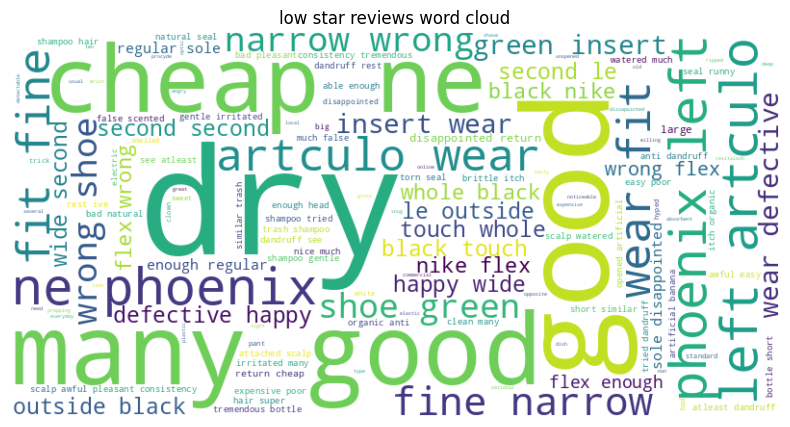

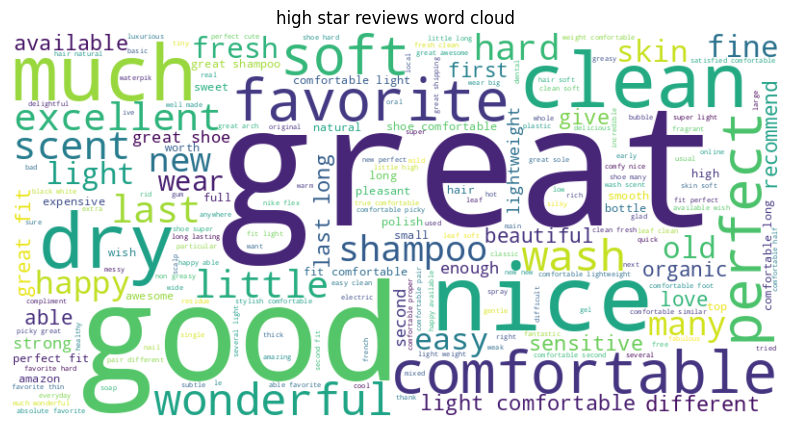

In [40]:
### Create low_star_reviews and high_star_reviews (0.1 marks)
# Filter low and high star reviews
low_star_reviews = " ".join(data_df[data_df['overall'] == 1]['processed_review'])
high_star_reviews = " ".join(data_df[data_df['overall'] == 5]['processed_review'])


### Generate two Word Clouds (0.1 marks)
generate_word_cloud_adjectives(low_star_reviews, "low star reviews word cloud")
generate_word_cloud_adjectives(high_star_reviews,"high star reviews word cloud")

In [41]:
### YOUR INSIGHTS HERE (0.1 marks)
#many low star reviews were talking about products being defective,irritation, expensive or wrong
# main contributers are shampoo and nike product.
# many good reviews are on comfort, fit, scent,clean.
#dry is a common word which might mean several things
# 1) it is a shampoo for dry scalp (product decription)
# 2) the shampoo is drying (bad product)
# 3) the shampoo is good for dry help (good product)
#judging from the fact that it is commonly appearing in both sides, it might just be a product description and not a review
#further TD-IDF might be done to eliminate this problem

# Part 2 (2 Marks)

In this section, you are required to do content based filtering for movie recommendation.

For the purposes of this section, the dataset used is the IMDB_top_1000.csv.

### Content Based Filtering Task Introduction

Content based filtering uses item features to generate recommendations. The underlying algorithm will extract features from an item and compare it to a new item. If the two items are similar then the new item is recommended.

<img src="https://drive.google.com/uc?id=1WvHQ4x5ZLTjacyYZdyFcJLxlt1XegVnN" width="400"></img>

### Import Packages Needed

In [42]:
import pandas as pd
import numpy as np
### Plot
import matplotlib.pyplot as plt
import seaborn as sns
### Natural Language Processing
from sklearn.feature_extraction.text import TfidfVectorizer

### Download Data File Needed

In [43]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1FgXwJNw1Pg2WtkWCYZCnsZGrHxpTvCVP' -O IMDB_top_1000.csv

--2024-02-07 15:36:23--  https://docs.google.com/uc?export=download&id=1FgXwJNw1Pg2WtkWCYZCnsZGrHxpTvCVP
Resolving docs.google.com (docs.google.com)... 74.125.132.102, 74.125.132.101, 74.125.132.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.132.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1FgXwJNw1Pg2WtkWCYZCnsZGrHxpTvCVP&export=download [following]
--2024-02-07 15:36:23--  https://drive.usercontent.google.com/download?id=1FgXwJNw1Pg2WtkWCYZCnsZGrHxpTvCVP&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.194.132, 2607:f8b0:4001:c10::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.194.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98421 (96K) [application/octet-stream]
Saving to: ‘IMDB_top_1000.csv’

IMDB_top_1000.csv   100%[===================>]  96.11K  --.-KB/s   

### Data Loading

For the purpose of this section, we will only consider two columns: `Title` and `Description`.

In [44]:
# Data Loading
raw_df = pd.read_csv("IMDB_top_1000.csv")
movie_df = raw_df[['Title', 'Description']].copy()
print(movie_df.shape)
movie_df.head(5)

(285, 2)


,Title,Description
0,The Shawshank Redemption,Two imprisoned men bond over a number of years...
1,The Godfather,The aging patriarch of an organized crime dyna...
2,The Dark Knight,When the menace known as the Joker wreaks havo...
3,The Godfather: Part II,The early life and career of Vito Corleone in ...
4,The Lord of the Rings: The Return of the King,Gandalf and Aragorn lead the World of Men agai...


### Task 1: TF-IDF

TF-IDF is employed here to convert textual information (movie descriptions) into numerical vectors. This allows for content-based filtering by measuring the similarity between movies based on the importance and uniqueness of terms.

#### Task 1.1: TfidfVectorizer (0.3 marks)

1. Create a TfidfVectorizer `tfidf` with English stop words.
2. Fit and transform the `Description` column of `movie_df` into `tfidf_scores`.
3. Check the shape of the resulting TF-IDF matrix (`tfidf_scores`) and explain the two dimension values.

In [45]:
### tfidf (0.2 marks)
tfidf = TfidfVectorizer(stop_words='english')

In [46]:
### Check the shape of the resulting TF-IDF matrix (tfidf_scores)
### and explain the two dimension values (0.1 marks)
tfidf_scores = tfidf.fit_transform(movie_df['Description'])
print(tfidf_scores.shape)
### Row: 285 movies in data df
### Column: 2363 unique words for all the movie descriptions

(285, 2363)


### Task 2: Cosine Similarity

#### Task 2.1: cos_sim() (0.3 marks)

Define the `cos_sim()` function which takes two vectors: `vector_a` and `vector_b` (e.g.: `np.array([1, 2, 3])`) as inputs and returns the cosine similarity value of the two vectors (Hint: use np.dot() and np.linalg.norm()).

In [47]:
### Define function to calculate cosine similarity (0.3 marks)
def cos_sim(vector_a, vector_b):
    similarity = 0
    dot_product = np.dot(vector_a, vector_b)
    len_a = np.linalg.norm(vector_a)
    len_b = np.linalg.norm(vector_b)
    if len_a == 0 or len_b == 0:
      return 0
    similarity = dot_product / (len_a * len_b)
    return similarity

#### Task 2.2: pairwise_cos_sim() (0.2 marks)

1. Define the `pairwise_cos_sim()` function to calculate the pairwise cosine similarity between a collection of vectors by making use of the `cos_sim()` defined in the previous task. The function takes `vectors` (e.g.: `np.array([[1,2,3],[1,2,3]])`) as input and returns the cosine similarity matrix (e.g.: `np.array([[1,1],[1,1]])`).
2. Apply the `pairwise_cos_sim()` function to `tfidf_scores.to_array()` to get the pairwise cosine similarity (`tfidf_cosine_sim`).

In [48]:
### Define function to calculate pairwise cosine similarity (0.1 marks)
def pairwise_cos_sim(vectors):
    similarity_matrix = np.zeros((len(vectors), len(vectors)))
    for i in range(len(vectors)):
      for j in range(i+1, len(vectors)):
        similarity_matrix[i, j] = cos_sim(vectors[i], vectors[j])
        similarity_matrix[j, i] = similarity_matrix[i, j]
    return similarity_matrix

In [49]:
### tfidf_cosine_sim (0.1 marks)
tfidf_cosine_sim = pairwise_cos_sim(tfidf_scores.toarray())
print(tfidf_cosine_sim.shape)

(285, 285)


#### Task 2.3: top cosine similarity pair (0.5 marks)

1. Find the top cosine similarity score (`top_cos_sim`) between two different movie descriptions by flattening the `tfidf_cos_sim` into a 1D array, sorting the values by `sorted()`, and indexing to retrieve the cosine similarity score.
2. Explain the reason for the index chosen in step 1.
3. Use `np.argwhere` to find the indices where the maximum value (`top_cos_sim`) occurs in `tfidf_cos_sim`.
4. Print the title and the movie description of the movie pair identified
and explain the intuitive reason for the high cosine similarity score.

In [50]:
### top_cos_sim (0.1 marks)
sorted_cos_sim = sorted(tfidf_cosine_sim.flatten(), reverse = True)
top_cos_sim = sorted_cos_sim[0]

### Explain the reason for choosing the index: (0.1 marks)
## the top cosine similarity score will be the first(indexed 0) item in the sorted cosine similarity list.


In [53]:
### Find the indices of top_cos_sim (0.1 marks)
indices = np.argwhere(tfidf_cosine_sim == top_cos_sim)

array([[ 33, 265],
       [265,  33]])

In [58]:
### Print the title and the movie description of the movie pair identified (0.1 marks)
index_movie1 = indices[0][0]
index_movie2 = indices[0][1]

print("First Movie:")
print("Title:", movie_df.iloc[index_movie1]['Title'])
print("Description:", movie_df.iloc[index_movie1]['Description'])
print()

print("Second Movie:")
print("Title:", movie_df.iloc[index_movie2]['Title'])
print("Description:", movie_df.iloc[index_movie2]['Description'])

### Explain the reason: (0.1 marks)
# there is a high cosine similarity score as the two movies have very similar movie descriptions
# with both having keywords "mole","undercover cop" and both are identifying the other.

First Movie:
Title: The Departed
Description: An undercover cop and a mole in the police attempt to identify each other while infiltrating an Irish gang in South Boston.

Second Movie:
Title: Infernal Affairs
Description: A story between a mole in the police department and an undercover cop. Their objectives are the same: to find out who is the mole, and who is the cop.


### Task 3: Movie Recommendation

#### Task 3.1: recommend_movies() (0.6 marks)

Define the `recommend_movies()` function with appropriate parameters. The function should take `data` (movie information Dataframe in the form of `movie_df`), `movie_name` (the title of the movie which should be within the input movie information Dataframe), `similarity_matrix` (matrix with pairwise cosine similarity scores like `tfidf_cosine_sim`) and an optional parameter `top_k` (the number of top recommendations, set the default value to be 5) as inputs and returns a Dataframe with the top k recommended movies:
1. Find and print the index of the input movie within the input DataFrame based on `Title` column.
2. Retrieve the cosine similarity scores for the input movie based on the index.
3. Sort the movie indices based on the similarity scores in descending order by using `np.argsort()`.
4. Extract the movie indices for the top k recommendation. (**Hint**: Be careful of the indices as we should not recommend the input movie back to the user.)
5. Use DataFrame indexing to retrieve a subset of the `data` DataFrame as `rec_df` which contains the details of the recommended movies.
6. Add one additional column `Similarity Score` to `rec_df` which contains the corresponding cosine similarity score between each recommended movie and the input movie.

In [68]:
### Define function to recommend movies (0.6 marks)
def recommend_movies(data, movie_name, similarity_matrix, top_k=5):
    # Find and print the index of the input movie within the input DataFrame
    movie_index = data.index[data['Title'] == movie_name].tolist()[0]
    print("Movie index:", movie_index)

    # Retrieve the cosine similarity scores for the input movie based on the index
    similarity_scores = similarity_matrix[movie_index]

    # Sort the movie indices based on the similarity scores in descending order
    sorted_indices = np.argsort(similarity_scores)[::-1]

    # Extract the movie indices for the top k recommendation
    top_indices = sorted_indices[1:top_k+1]  # Exclude the input movie itself

    # Use DataFrame indexing to retrieve a subset of the data DataFrame as rec_df
    rec_df = data.iloc[top_indices].copy()

    # Add one additional column Similarity Score to rec_df
    rec_df['Similarity Score'] = similarity_scores[top_indices]
    return rec_df

#### Task 3.2: batman begins (0.1 marks)
Apply the `recommend_movies()` function to recommend two movies similar to the movie `"Batman Begins"`. Set `data` to be `movie_df` and `similarity_matrix` to `tfidf_cos_sim`.

**Tips**: For your project, you can find the TFIDF Values of the keywords (such as `'batman', 'joker', 'gotham'`) within the description of movies (such as "Batman Begins" and the two movies recommended) and create a barplot for visualization to understand their similarity. See below for one simple example.

In [71]:
### Recommend two movies (0.1 marks)
recommend_movies(movie_df, "Batman Begins", tfidf_cosine_sim, 2)

Movie index: 117


,Title,Description,Similarity Score
2,The Dark Knight,When the menace known as the Joker wreaks havo...,0.191830
17,Star Wars: Episode V - The Empire Strikes Back,After the Rebels are brutally overpowered by t...,0.130851


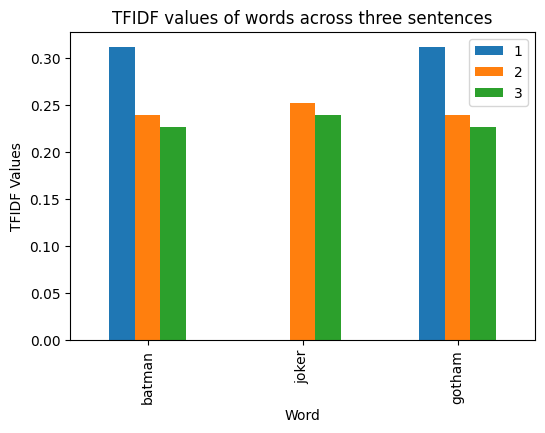

In [72]:
### TFIDF values visualization (Uncomment codes below to see the output)
keywords = ['batman', 'joker', 'gotham']
feature_names = tfidf.get_feature_names_out() # (0.1 marks)

# # TFIDF values of keywords in "Batman Begins" description
tfidf_scores_array_1 = tfidf_scores.toarray()[117] # (0.1 marks)
word_tfidf_dict_1 = dict(zip(feature_names, tfidf_scores_array_1)) # (0.1 marks)
tfidf_1 = {word: word_tfidf_dict_1[word] for word in keywords}

# # TFIDF values of keywords in "The Dark Knight Rises" description
tfidf_scores_array_2 = tfidf_scores.toarray()[56]
word_tfidf_dict_2 = dict(zip(feature_names, tfidf_scores_array_2))
tfidf_2 = {word: word_tfidf_dict_2[word] for word in keywords}

# # TFIDF values of keywords in "The Dark Knight" description
tfidf_scores_array_3 = tfidf_scores.toarray()[2]
word_tfidf_dict_3 = dict(zip(feature_names, tfidf_scores_array_3))
tfidf_3 = {word: word_tfidf_dict_3[word] for word in keywords}

# # Create DataFrames
df1 = pd.DataFrame(list(tfidf_1.items()), columns=['Word', '1'])
df2 = pd.DataFrame(list(tfidf_2.items()), columns=['Word', '2'])
df3 = pd.DataFrame(list(tfidf_3.items()), columns=['Word', '3'])

# # Merge DataFrames on 'Word'
merged_df = pd.merge(df1, df2, on='Word')
merged_df = pd.merge(merged_df, df3, on='Word')

# # Plotting
ax = merged_df.plot(kind='bar', x='Word', figsize=(6,4))

# # Adding labels and title
ax.set_xlabel('Word')
ax.set_ylabel('TFIDF Values')
plt.title('TFIDF values of words across three sentences')

# # Show the plot
plt.show()